In [2]:
# Data manipulation
import numpy as np
import pandas as pd

#
import os
import glob

# Visualization.
import matplotlib.pyplot as plt
import seaborn as sns

#
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy.stats import kurtosis
from scipy.stats import skew
import statistics
# Display all columns
pd.set_option('display.max_columns', 1500,
              'display.max_rows', 1500)
pd.set_option('display.max_colwidth', None)

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [3]:
df = pd.read_excel('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Data/MS182 - Survey Data and Population Totals/Codebook_HealthSurvey_09212021.xlsx')
survey = pd.read_csv('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Data/MS182 - Survey Data and Population Totals/adult_survey_prevalence_city_08012021.csv')
PRJT = pd.read_csv('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Data/MS182 - Survey Data and Population Totals/PRJT_L1AD_20200914.csv')
PRJG = pd.read_csv('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Data/MS182 - Survey Data and Population Totals/PRJG_L1AD_20200915.csv')

In [4]:
c = survey.ISO2.unique()
for i in c:
    df = survey[survey.ISO2 == i]
    l = ('%s - %s')%(i, df.YEAR.unique())
    print(l)

AR - [2013]
BR - [2013]
CL - [2010 2017]
CO - [2007 2010]
CR - [2005]
GT - [2002 2015]
MX - [2012 2016]
NI - [2003]
PA - [2007]
PE - [2016]
SV - [2014 2004]


## Merge between population data and survey data

In [5]:
PRJT = PRJT[['YEAR', 'SALID1', 'PRJL1ADPOP', 'PRJL1ADPOPF', 'PRJL1ADPOPM']]
dfull = survey.merge(PRJT, on=['SALID1','YEAR'], how='inner', indicator=False)

In [6]:
dfull['Obesity0'] = dfull['SVYBMIOBESE']

In [7]:
#dfull.info()

In [8]:
dfull.head()

,ISO2,YEAR,SALID1,SEX,STANDARD_POP,SVYDBDX1,SVYDBDX1_LCI,SVYDBDX1_UCI,SVYDBDX2,SVYDBDX2_LCI,SVYDBDX2_UCI,SVYBMIOBESE,SVYBMIOBESE_LCI,SVYBMIOBESE_UCI,SVYBMISOBESE,SVYBMISOBESE_LCI,SVYBMISOBESE_UCI,SVYBMIOVOB,SVYBMIOVOB_LCI,SVYBMIOVOB_UCI,SVYBMISOVOB,SVYBMISOVOB_LCI,SVYBMISOVOB_UCI,SVYBMIUWT,SVYBMIUWT_LCI,SVYBMIUWT_UCI,SVYBMISUWT,SVYBMISUWT_LCI,SVYBMISUWT_UCI,SVYHTMED,SVYHTMED_LCI,SVYHTMED_UCI,SVYHLTHFP,SVYHLTHFP_LCI,SVYHLTHFP_UCI,SVYSMKCUR,SVYSMKCUR_LCI,SVYSMKCUR_UCI,SVYPAP3YRS,SVYPAP3YRS_LCI,SVYPAP3YRS_UCI,SVYMAM2YRS,SVYMAM2YRS_LCI,SVYMAM2YRS_UCI,PRJL1ADPOP,PRJL1ADPOPF,PRJL1ADPOPM,Obesity0
0,AR,2013,101106,Overall,Salurbal Sex Pooled,0.091490,0.070701,0.115802,NaN,NaN,NaN,NaN,NaN,NaN,0.235572,0.199216,0.274615,NaN,NaN,NaN,0.596112,0.554123,0.637337,NaN,NaN,NaN,0.021961,0.013653,0.035311,0.140763,0.117779,0.165946,0.233613,0.197030,0.270396,0.245506,0.209850,0.283363,NaN,NaN,NaN,NaN,NaN,NaN,211587.0,108449.0,103138.0,NaN
1,AR,2013,101106,Overall,Country Sex Pooled,0.101280,0.078524,0.127301,NaN,NaN,NaN,NaN,NaN,NaN,0.241163,0.204237,0.280876,NaN,NaN,NaN,0.607561,0.565482,0.648338,NaN,NaN,NaN,0.020788,0.012951,0.033554,0.169499,0.143089,0.197751,0.254130,0.216257,0.292187,0.236965,0.202676,0.273682,NaN,NaN,NaN,NaN,NaN,NaN,211587.0,108449.0,103138.0,NaN
2,AR,2013,101106,Overall,True City,0.094486,0.073203,0.119149,NaN,NaN,NaN,NaN,NaN,NaN,0.237590,0.201090,0.276862,NaN,NaN,NaN,0.599641,0.557836,0.640619,NaN,NaN,NaN,0.021620,0.013454,0.034746,0.150767,0.126557,0.176828,0.240196,0.203485,0.277137,0.243493,0.208344,0.281095,NaN,NaN,NaN,NaN,NaN,NaN,211587.0,108449.0,103138.0,NaN
3,AR,2013,101106,Females,Salurbal Sex Specific,0.078179,0.054333,0.107615,NaN,NaN,NaN,NaN,NaN,NaN,0.228544,0.181792,0.280226,NaN,NaN,NaN,0.535025,0.476817,0.595035,NaN,NaN,NaN,0.033013,0.019476,0.055117,0.162299,0.129494,0.198566,0.289272,0.238659,0.341888,0.224152,0.176103,0.278426,NaN,NaN,NaN,NaN,NaN,NaN,211587.0,108449.0,103138.0,NaN
4,AR,2013,101106,Females,True City,0.081653,0.056804,0.111883,NaN,NaN,NaN,NaN,NaN,NaN,0.230810,0.183805,0.283143,NaN,NaN,NaN,0.539487,0.481473,0.599382,NaN,NaN,NaN,0.032812,0.019368,0.054742,0.174093,0.139482,0.211643,0.297386,0.246303,0.350506,0.221142,0.173748,0.274531,NaN,NaN,NaN,NaN,NaN,NaN,211587.0,108449.0,103138.0,NaN


## dfull is the dataset after merge using city cod and year

In [9]:
dt = dfull[(dfull.SEX == 'Overall') & (dfull.STANDARD_POP == 'True City')]
dt = dt[((dt.YEAR == 2013) & (dt.ISO2 == 'BR')) |
        ((dt.YEAR == 2013) & (dt.ISO2 == 'AR')) |
        ((dt.YEAR == 2017) & (dt.ISO2 == 'CL')) |
        ((dt.YEAR == 2007) & (dt.ISO2 == 'CO')) |
        ((dt.YEAR == 2016) & (dt.ISO2 == 'MX')) |
        ((dt.YEAR == 2016) & (dt.ISO2 == 'PE'))
        ]
pop = 'PRJL1ADPOP'
dt['Diabetes'] = dt.SVYDBDX1
dt['Hypertension'] = dt.SVYHTMED
dt['Tobacco'] = dt.SVYSMKCUR
dt['Obesity'] = dt.Obesity0

dt = dt[['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']]

dt.describe()

,Diabetes,Hypertension,Tobacco,Obesity
count,191.000000,190.000000,191.000000,154.000000
mean,0.071029,0.117895,0.186808,0.276821
std,0.028117,0.044391,0.072418,0.091603
min,0.021375,0.030972,0.085822,0.113737
25%,0.043704,0.080895,0.130077,0.190702
50%,0.076348,0.111346,0.167432,0.302457
75%,0.094375,0.155029,0.242165,0.355958
max,0.134816,0.224506,0.381892,0.440451


In [10]:
countries = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
years =     [2013, 2013, 2017, 2007, 2016, 2016]
popp = []

for i in range(len(countries)):
    dfull2 = dfull[(dfull.SEX == 'Overall') & (dfull.STANDARD_POP == 'True City')]
    dfull3 = dfull2[(dfull2.YEAR == years[i]) & (dfull2.ISO2 == countries[i])]
    print(dfull3['PRJL1ADPOP'].sum())
    

77601150.0
29091484.0
13019739.0
25759096.0
71742230.0
18137225.276610136


## Here I just count the cities by countries

In [11]:
df_count = dfull.groupby(['ISO2']).agg({'SALID1': lambda x: x.nunique()})
df_count.sort_values(by='SALID1', ascending=False)

,SALID1
ISO2,
MX,91
CO,35
AR,33
BR,27
PE,23
CL,21
SV,3
GT,1


In [12]:
def fitting(dfull0, variables, desc_var, pop, pop_name, years, countries):
    list_string = list(map(str, years))
    results = pd.DataFrame()
    nn = [s1 +'('+ s2 +')' for s1, s2 in zip(countries, list_string)]
    results['years'] = nn
    Diabetes = []
    Hypertension = []
    Tobacco = []
    Obesity = []
    CI_Diabetes = []
    CI_Hypertension = []
    CI_Tobacco = []
    CI_Obesity = []

    for k in range(len(years)):
        
        print(years[k])
        print(countries[k])
        
        dfull = dfull0[(dfull0.YEAR == years[k]) & (dfull0.ISO2 == countries[k])]
    
        dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
        dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
        dfull['Tobacco'] = dfull[pop]*dfull.SVYSMKCUR
        dfull['Obesity'] = dfull[pop]*dfull.Obesity0
        
        #dfull.loc[:,'Diabetes'] = dfull.loc[:,pop]*dfull.loc[:,'SVYDBDX1']
        #dfull.loc[:,'Hypertension'] = dfull.loc[:,pop]*dfull.loc[:,'SVYHTMED']
        #dfull.loc[:,'Tobacco'] = dfull.loc[:,pop]*dfull.loc[:,'SVYSMKCUR']

        for j in range(len(variables)):
            
            alpha_L1AD = []
            Y0_L1AD = []
            residuos_L1AD = []
            bL = []
            bU = []
            IC = []

            df = pd.DataFrame({'x': np.log10(dfull[pop])})
            df["y"] = np.log10(dfull[variables[j]])

            df = df.reset_index(drop=True)
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df[pd.notnull(df['y'])]
            cities = len(df.y.unique())
            #print(len(df))
            
            if len(df) >= 1:
                
                y = df.y
                x = df.x

                #print(y)
                #print(x)

                y = np.nan_to_num(y)
                x = np.nan_to_num(x)

                model = LinearRegression()
                x = np.array(x)
                x = x.reshape(-1,1)
                model.fit(x,y)
                predd = model.predict(x)

                X = sm.add_constant(x)
                mod = sm.OLS(y,X)
                res = mod.fit()
                ic = res.conf_int(0.05)
                ic = np.round(ic[1], decimals=3)
                #print(ic[1])
                #da = pd.read_html(res.summary().tables[1].as_html(),header=0,index_col=0)[0]
                #print(da['coef'].values[1])
                #print(round(model.coef_[0],3))


                alpha_L1AD.append(round(model.coef_[0],3))
                Y0_L1AD.append(round(model.intercept_,3))
                residuos_L1AD.append(round(model.score(x, y),3))

                R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))

                res = y - predd

                if (variables[j] == 'Diabetes'):
                    Diabetes.append(round(model.coef_[0],3))
                    CI_Diabetes.append(ic)

                elif (variables[j] == 'Hypertension'):
                    Hypertension.append(round(model.coef_[0],3))
                    CI_Hypertension.append(ic)

                elif (variables[j] == 'Obesity'):
                    Obesity.append(round(model.coef_[0],3))
                    CI_Obesity.append(ic)
                    #print(round(model.coef_[0],7))
                    #print(ic)

                else:
                    Tobacco.append(round(model.coef_[0],3))
                    CI_Tobacco.append(ic)

                plt.figure(figsize=(16, 9))

                plt.plot(x, predd, 'r-', linewidth=7.0, label = r'$\beta$ = {}'.format(round(model.coef_[0],3)) + "\n" +
                           r'$IC$ = {}'.format(ic)  + "\n" +
                           r'$R^2$ = {}'.format(round(R2,3)) + "\n" +
                           r'$Cities$ = {}'.format(cities))
                
                plt.plot(x, y, marker="o", markersize = 17, color='g', mfc='none', mew=5, ls="none") #, mfc='none'
                #plt.plot(df_Overall.Diabetes, 'o', markersize = 15,color='r', mfc='none',  label = 'Diabetes', mew=5, ls="none")

                plt.title(desc_var[j]+ ': ' + nn[k], fontsize=55)
                plt.xlabel('log(' + pop_name + ')', fontsize=35)
                l = 'log(' + desc_var[j] + ')'
                plt.ylabel(l, fontsize=35)
                #plt.title('Year ' + str(i), fontsize=35)
                plt.xticks(fontsize=35)
                plt.yticks(fontsize=35)
                plt.legend(fontsize=25)
                path = ('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Figures_Survey/%s_%s_%s.png')%(desc_var[j],pop_name,nn[k])
                plt.savefig(path)
                plt.close()
            
            else:
                
                if (variables[j] == 'Diabetes'):
                    Diabetes.append(None)
                    CI_Diabetes.append(None)

                elif (variables[j] == 'Hypertension'):
                    Hypertension.append(None)
                    CI_Hypertension.append(None)

                elif (variables[j] == 'Obesity'):
                    Obesity.append(None)
                    CI_Obesity.append(None)

                else:
                    Tobacco.append(None)
                    CI_Tobacco.append(None)
                
            
    results['Diabetes'] = Diabetes
    results[r'CI$_{95\%}$: Diabetes'] = CI_Diabetes
    results['Hypertension'] = Hypertension
    results[r'CI$_{95\%}$ Hypertension'] = CI_Hypertension
    results['Tobacco'] = Tobacco
    results[r'CI$_{95\%}$ Tobacco'] = CI_Tobacco
    results['Obesity'] = Obesity
    results[r'CI$_{95\%}$ Obesity'] = CI_Obesity
    

    return results


In [13]:
dfull2 = dfull[(dfull.SEX == 'Overall') & (dfull.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOP'
pop_name = 'Entire population'
countries = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
years =     [2013, 2013, 2017, 2007, 2016, 2016]
Overall = fitting(dfull2, variables,desc_var,pop,pop_name, years, countries)

2013
BR


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2013
AR


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2017
CL


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2007
CO


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2016
MX


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2016
PE


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [14]:
dfull2 = dfull[(dfull.SEX == 'Females') & (dfull.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOPF'
pop_name = 'Female Population'
countries = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
years =     [2013, 2013, 2017, 2007, 2016, 2016]
Female = fitting(dfull2, variables,desc_var,pop,pop_name, years, countries)

2013
BR


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2013
AR


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2017
CL


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2007
CO


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2016
MX


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2016
PE


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

In [15]:
dfull2 = dfull[(dfull.SEX == 'Males') & (dfull.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOPM'
pop_name = 'Male Population'
countries = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
years =     [2013, 2013, 2017, 2007, 2016, 2016]
Male = fitting(dfull2, variables,desc_var,pop,pop_name, years, countries)

2013
BR


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2013
AR


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2017
CL


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2007
CO


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2016
MX


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

2016
PE


<ipython-input-12-ac601ab9fdb3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
<ipython-input-12-ac601ab9fdb3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
<ipython-input-12-ac601ab9fdb3>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

# Novas Análises

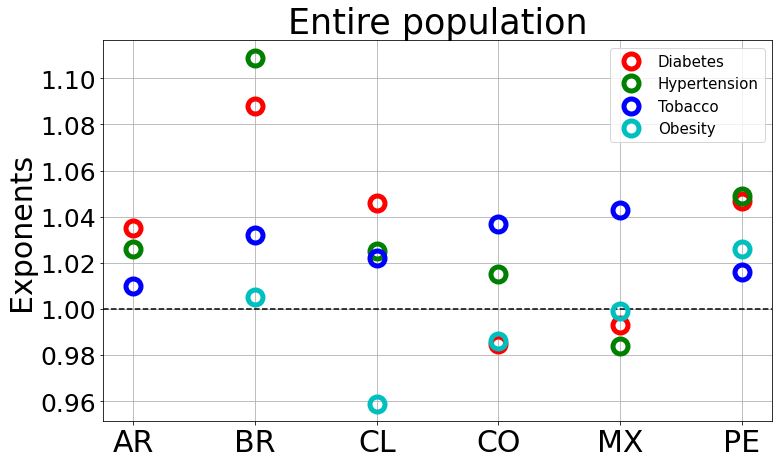

In [17]:
df_Overall = Overall
df_Overall = df_Overall.reset_index()
df_Overall['countries'] = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
df_Overall = df_Overall.sort_values(by=['countries'])

plt.figure(figsize=(12, 7))
plt.axhline(y=1.0, color='black', linestyle='--')
n = df_Overall.countries

plt.plot(df_Overall['countries'], df_Overall.Diabetes, 'o', markersize = 15,color='r', mfc='none',  label = 'Diabetes', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Hypertension, 'o', markersize = 15,color='g', mfc='none',  label = 'Hypertension', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Tobacco, 'o', markersize = 15,color='b', mfc='none',  label = 'Tobacco', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Obesity, 'o', markersize = 15,color='c', mfc='none',  label = 'Obesity', mew=5, ls="none")

plt.title('Entire population', fontsize=35)
plt.ylabel('Exponents', fontsize=30)
plt.xticks(fontsize=30)
#plt.xticks([], [])
plt.yticks(fontsize=25)
plt.legend(fontsize=15)
plt.grid()
path = ('/Users/aurelianosancho/Documents/Fig5_entire_population.png')
plt.savefig(path)
plt.show()

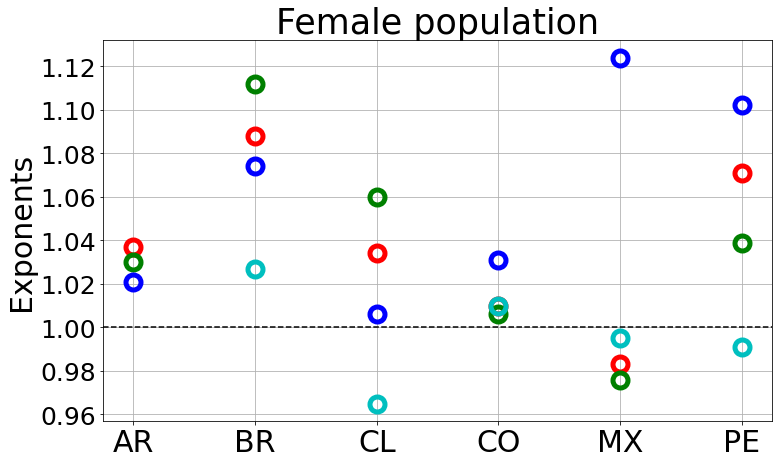

In [18]:
df_Overall = Female
df_Overall = df_Overall.reset_index()
df_Overall['countries'] = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
df_Overall = df_Overall.sort_values(by=['countries'])

plt.figure(figsize=(12, 7))
plt.axhline(y=1.0, color='black', linestyle='--')
n = df_Overall.countries

plt.plot(df_Overall['countries'], df_Overall.Diabetes, 'o', markersize = 15,color='r', mfc='none', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Hypertension, 'o', markersize = 15,color='g', mfc='none', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Tobacco, 'o', markersize = 15,color='b', mfc='none', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Obesity, 'o', markersize = 15,color='c', mfc='none', mew=5, ls="none")

plt.title('Female population', fontsize=35)
plt.ylabel('Exponents', fontsize=30)
plt.xticks(fontsize=30)
#plt.xticks([], [])
plt.yticks(fontsize=25)
#plt.legend(fontsize=15)
plt.grid()
path = ('/Users/aurelianosancho/Documents/Fig5_female_population.png')
plt.savefig(path)
plt.show()

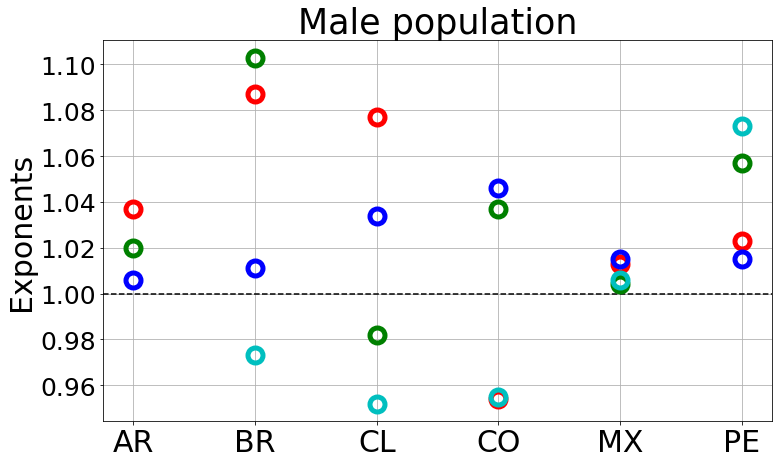

In [20]:
df_Overall = Male
df_Overall = df_Overall.reset_index()
df_Overall['countries'] = ['BR', 'AR', 'CL', 'CO', 'MX', 'PE']
df_Overall = df_Overall.sort_values(by=['countries'])

plt.figure(figsize=(12, 7))
plt.axhline(y=1.0, color='black', linestyle='--')
n = df_Overall.countries

plt.plot(df_Overall['countries'], df_Overall.Diabetes, 'o', markersize = 15,color='r', mfc='none',  label = 'Diabetes', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Hypertension, 'o', markersize = 15,color='g', mfc='none',  label = 'Hypertension', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Tobacco, 'o', markersize = 15,color='b', mfc='none',  label = 'Tobacco', mew=5, ls="none")
plt.plot(df_Overall['countries'], df_Overall.Obesity, 'o', markersize = 15,color='c', mfc='none',  label = 'Obesity', mew=5, ls="none")

plt.title('Male population', fontsize=35)
plt.ylabel('Exponents', fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=25)
#plt.legend(fontsize=15)
plt.grid()
path = ('/Users/aurelianosancho/Documents/Fig5_male_population.png')
plt.savefig(path)
plt.show()

#----------------------------------------------------------------------------------------------------------------------

In [ ]:
Overall = Overall.sort_values(by = 'years')
Overall2 = Overall.drop('years', 1)
Overall2 = Overall2.T
Overall2.columns = list(Overall.years)
Overall2.style.set_caption("Overall - True City - Entire population").set_table_styles([{'selector': 'caption',
    'props': [ ('color', 'red'),('font-size', '17px')]}])

In [ ]:
Female = Female.sort_values(by = 'years')
Female2 = Female.drop('years', 1)
Female2 = Female2.T
Female2.columns = list(Female.years)
Female2.style.set_caption("Female - True City - Female Population").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'),('font-size', '16px')]}])

In [ ]:
Male = Male.sort_values(by = 'years')
Male2 = Male.drop('years', 1)
Male2 = Male2.T
Male2.columns = list(Male.years)
Male2.style.set_caption("Male - True City - Male Population").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'),('font-size', '17px')]}])

## Second part

* Stratifying by country (where possible: AR, CL, BR, MX, CO, PE? You could pool all central American countries into one). 

* And we need to think about age-adjustment. I’ll think of something for our next meeting, but what we did in the scaling of mortality paper is to calculate the % of the population aged 15-39, 40-64, and 65+, and add them as adjustment covariates to the OLS. 

In [ ]:
def fitting_country(dfull0, variables, desc_var, pop, pop_name, years, country):
    results = pd.DataFrame()
    results['years'] = years
    Diabetes = []
    Hypertension = []
    Tobacco = []
    Obesity = []
    CI_Diabetes = []
    CI_Hypertension = []
    CI_Tobacco = []
    CI_Obesity = []
    
    
    countries = dfull0.ISO2.unique()

    dfull0 = dfull0[dfull0.ISO2 == country]
    for k in years:


        dfull = dfull0[dfull0.YEAR == k]

        dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
        dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
        dfull['Tobacco'] = dfull[pop]*dfull.SVYSMKCUR
        dfull['Obesity'] = dfull[pop]*dfull.Obesity0
        
        a = 2  # number of rows
        b = 2  # number of columns
        c = 1  # initialize plot counter
        
        plt.figure(figsize=(16, 9))

        for j in range(len(variables)):

            alpha_L1AD = []
            Y0_L1AD = []
            residuos_L1AD = []
            bL = []
            bU = []
            IC = []

            df = pd.DataFrame({'x': np.log10(dfull[pop])})
            df["y"] = np.log10(dfull[variables[j]])

            df = df.reset_index(drop=True)
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df[pd.notnull(df['y'])]
            cities = len(df.y.unique())

            if len(df) >= 1:
                
                y = df.y
                x = df.x

                #print(y)
                #print(x)

                y = np.nan_to_num(y)
                x = np.nan_to_num(x)

                model = LinearRegression()
                x = np.array(x)
                x = x.reshape(-1,1)
                model.fit(x,y)
                predd = model.predict(x)

                X = sm.add_constant(x)
                mod = sm.OLS(y,X)
                res = mod.fit()
                ic = res.conf_int(0.05)
                ic = np.round(ic[1], decimals=3)
                #print(ic[1])
                #da = pd.read_html(res.summary().tables[1].as_html(),header=0,index_col=0)[0]
                #print(da['coef'].values[1])
                #print(round(model.coef_[0],3))


                alpha_L1AD.append(round(model.coef_[0],7))
                Y0_L1AD.append(round(model.intercept_,7))
                residuos_L1AD.append(round(model.score(x, y),7))

                R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))

                res = y - predd

                if (variables[j] == 'Diabetes'):
                    Diabetes.append(round(model.coef_[0],7))
                    CI_Diabetes.append(ic)

                elif (variables[j] == 'Hypertension'):
                    Hypertension.append(round(model.coef_[0],7))
                    CI_Hypertension.append(ic)

                elif (variables[j] == 'Obesity'):
                    Obesity.append(round(model.coef_[0],7))
                    CI_Obesity.append(ic)
                    print(round(model.coef_[0],7))
                    print(ic)

                else:
                    Tobacco.append(round(model.coef_[0],7))
                    CI_Tobacco.append(ic)


                    
               
                
                
                
                
                plt.subplot(a, b, c)

                plt.plot(x, predd, 'r-', linewidth=7.0, label = r'$\beta$ = {}'.format(round(model.coef_[0],3)) + "\n" +
                           r'$IC$ = {}'.format(ic)  + "\n" +
                           r'$R^2$ = {}'.format(round(R2,3)) + "\n" +
                           r'$Cities$ = {}'.format(cities))
                plt.plot(x, y, marker="o", markersize = 17,color='g', mfc='none',  label = 'Diabetes', mew=5, ls="none")
                

                plt.title(desc_var[j] + ': ' + country + '(' + str(k)+')', fontsize=25)
                plt.xlabel('log(' + pop_name + ')', fontsize=17)
                l = 'log(' + desc_var[j] + ')'
                plt.ylabel(l, fontsize=17)
                #plt.title('Year ' + str(i), fontsize=35)
                plt.xticks(fontsize=17)
                plt.yticks(fontsize=17)
                plt.legend(fontsize=12)
                c = c + 1
                
            
            else:
                
                if (variables[j] == 'Diabetes'):
                    Diabetes.append(None)
                    CI_Diabetes.append(None)

                elif (variables[j] == 'Hypertension'):
                    Hypertension.append(None)
                    CI_Hypertension.append(None)

                elif (variables[j] == 'Obesity'):
                    Obesity.append(None)
                    CI_Obesity.append(None)

                else:
                    Tobacco.append(None)
                    CI_Tobacco.append(None)


    path = ('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Figures_Survey_Country/TOTAL%s_%s_%s_%s.png')%(desc_var[j],pop_name,k,country)
    plt.tight_layout()
    plt.savefig(path)
    plt.close()
    
    results['Diabetes'] = Diabetes
    results[r'CI$_{95\%}$: Diabetes'] = CI_Diabetes
    results['Hypertension'] = Hypertension
    results[r'CI$_{95\%}$ Hypertension'] = CI_Hypertension
    results['Tobacco'] = Tobacco
    results[r'CI$_{95\%}$ Tobacco'] = CI_Tobacco
    results['Obesity'] = Obesity
    results[r'CI$_{95\%}$ Obesity'] = CI_Obesity

    return results

In [ ]:
dfull2 = dfull[(dfull.SEX == 'Overall') & (dfull.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOP'
pop_name = 'Entire population'
years = [2016]
country = 'PE'
Overall = fitting_country(dfull2, variables,desc_var,pop,pop_name, years,country)

In [ ]:
Overall = Overall.sort_values(by = 'years')
Overall2 = Overall.drop('years', 1)
Overall2 = Overall2.T
Overall2.columns = list(Overall.years)
Overall2.style.set_caption("Overall - True City - Full Population (BR)").set_table_styles([{'selector': 'caption',
    'props': [ ('color', 'red'),('font-size', '17px')]}])

## Third part

*  Stratified by age

In [ ]:
age = pd.read_csv('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Data/population_by_age_year.csv')

In [ ]:
dfull_age = dfull.merge(age, on=['ISO2','SALID1','YEAR'], how='inner', indicator=False) 

In [ ]:
dfull_age.head(3)

In [ ]:
#dfull_age['pop_15_39'] = dfull_age['prop15']*dfull_age['PRJL1ADPOP']
#dfull_age['pop_40_64'] = dfull_age['prop40']*dfull_age['PRJL1ADPOP']
#dfull_age['pop_65'] = dfull_age['prop65']*dfull_age['PRJL1ADPOP']

In [ ]:
def fitting_age(dfull0, variables, desc_var, pop, pop_name, years, countries):
    list_string = list(map(str, years))
    results = pd.DataFrame()
    nn = [s1 +'('+ s2 +')' for s1, s2 in zip(countries, list_string)]
    #print(nn)
    results['years'] = nn
    Diabetes = []
    Hypertension = []
    Tobacco = []
    Obesity = []
    CI_Diabetes = []
    CI_Hypertension = []
    CI_Tobacco = []
    CI_Obesity = []

    for k in range(len(years)):
        #print(k)
        #print(years[k])
        #print(countries[k])
        
        dfull = dfull0[(dfull0.YEAR == years[k]) & (dfull0.ISO2 == countries[k])]
    
        dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
        dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
        dfull['Tobacco'] = dfull[pop]*dfull.SVYSMKCUR
        dfull['Obesity'] = dfull[pop]*dfull.Obesity0
        
        #dfull.loc[:,'Diabetes'] = dfull.loc[:,pop]*dfull.loc[:,'SVYDBDX1']
        #dfull.loc[:,'Hypertension'] = dfull.loc[:,pop]*dfull.loc[:,'SVYHTMED']
        #dfull.loc[:,'Tobacco'] = dfull.loc[:,pop]*dfull.loc[:,'SVYSMKCUR']

        for j in range(len(variables)):
            
            alpha_L1AD = []
            Y0_L1AD = []
            residuos_L1AD = []
            bL = []
            bU = []
            IC = []

            df = pd.DataFrame({'Total': np.log10(dfull[pop])})
            df['pop_15_39'] = (dfull['prop15'])
            df['pop_40_64'] = (dfull['prop40'])
            df['pop_65']    = (dfull['prop65'])
            
            df["y"] = np.log10(dfull[variables[j]])

            df = df.reset_index(drop=True)
            df = df.replace([np.inf, -np.inf], np.nan)
            df = df[pd.notnull(df['y'])]
            cities = len(df.y.unique())
            #print('len'+str(len(df)))
            
            if len(df) >= 1:
                
                y = df.y
                x = df[['Total', 'pop_15_39', 'pop_40_64', 'pop_65']]
                
                #print(countries[k])
                #print(x)

                #print(y)
                #print(x)

                y = np.nan_to_num(y)
                x = np.nan_to_num(x)

                model = LinearRegression()
                x = np.array(x)
                #x = x.reshape(-1,1)
                model.fit(x,y)
                predd = model.predict(x)
                print('coeficients')
                print(model.coef_)

                X = sm.add_constant(x)
                mod = sm.OLS(y,X)
                res = mod.fit()
                ic = res.conf_int(0.05)
                #print('IC')
                #print(ic)
                ic = np.round(ic[1], decimals=3)
                
                #da = pd.read_html(res.summary().tables[1].as_html(),header=0,index_col=0)[0]
                #print(da['coef'].values[1])
                #print(model.coef_)


                alpha_L1AD.append(round(model.coef_[0],3))
                Y0_L1AD.append(round(model.intercept_,3))
                residuos_L1AD.append(round(model.score(x, y),3))

                R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))

                res = y - predd

                if (variables[j] == 'Diabetes'):
                    Diabetes.append(round(model.coef_[0],3))
                    CI_Diabetes.append(ic)

                elif (variables[j] == 'Hypertension'):
                    Hypertension.append(round(model.coef_[0],3))
                    CI_Hypertension.append(ic)

                elif (variables[j] == 'Obesity'):
                    Obesity.append(round(model.coef_[0],3))
                    CI_Obesity.append(ic)
                    #print(round(model.coef_[0],7))
                    #print(ic)

                else:
                    Tobacco.append(round(model.coef_[0],3))
                    CI_Tobacco.append(ic)

                plt.figure(figsize=(16, 9))

                plt.plot(x, predd, 'r-', linewidth=7.0, 
                           label = r'$\beta$ = {}'.format(round(model.coef_[0],3))) # + "\n" +
                           #r'$IC$ = {}'.format(ic)  + "\n" +
                           #r'$R^2$ = {}'.format(round(R2,3)) + "\n" +
                           #r'$Cities$ = {}'.format(cities))
                plt.plot(x, y, marker="o", markersize = 17,color='g', mfc='none',  label = 'Diabetes', mew=5, ls="none")

                plt.title(desc_var[j]+ ': ' + nn[k], fontsize=55)
                plt.xlabel('log(' + pop_name + ')', fontsize=35)
                l = 'log(' + desc_var[j] + ')'
                plt.ylabel(l, fontsize=35)
                #plt.title('Year ' + str(i), fontsize=35)
                plt.xticks(fontsize=35)
                plt.yticks(fontsize=35)
                plt.legend(fontsize=25)
                path = ('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Figures_Age/%s_%s_%s.png')%(desc_var[j],pop_name,nn[k])
                plt.savefig(path)
                plt.close()
            
            else:
                
                if (variables[j] == 'Diabetes'):
                    Diabetes.append(None)
                    CI_Diabetes.append(None)

                elif (variables[j] == 'Hypertension'):
                    Hypertension.append(None)
                    CI_Hypertension.append(None)

                elif (variables[j] == 'Obesity'):
                    Obesity.append(None)
                    CI_Obesity.append(None)

                else:
                    Tobacco.append(None)
                    CI_Tobacco.append(None)
                
            
    results['Diabetes'] = Diabetes
    results[r'CI$_{95\%}$: Diabetes'] = CI_Diabetes
    results['Hypertension'] = Hypertension
    results[r'CI$_{95\%}$ Hypertension'] = CI_Hypertension
    results['Tobacco'] = Tobacco
    results[r'CI$_{95\%}$ Tobacco'] = CI_Tobacco
    results['Obesity'] = Obesity
    results[r'CI$_{95\%}$ Obesity'] = CI_Obesity
    

    return results




In [ ]:
dfull2 = dfull_age[(dfull_age.SEX == 'Overall') & (dfull_age.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOP'
pop_name = 'Entire population'
countries = ['BR', 'AR', 'CL', 'MX', 'PE']
years =     [2013, 2013, 2010, 2016, 2016]
Overall = fitting_age(dfull2, variables,desc_var,pop,pop_name, years, countries)

In [ ]:
Overall = Overall.sort_values(by = 'years')
Overall2 = Overall.drop('years', 1)
Overall2 = Overall2.T
Overall2.columns = list(Overall.years)
Overall2.style.set_caption("Overall - True City - Full Population").set_table_styles([{'selector': 'caption',
    'props': [ ('color', 'red'),('font-size', '17px')]}])

In [ ]:
dfull2 = dfull_age[(dfull_age.SEX == 'Females') & (dfull_age.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOPF'
pop_name = 'Female Population'
countries = ['BR', 'AR', 'CL', 'MX', 'PE']
years =     [2013, 2013, 2010, 2016, 2016]
Female = fitting_age(dfull2, variables,desc_var,pop,pop_name, years, countries)

In [ ]:
Female = Female.sort_values(by = 'years')
Female2 = Female.drop('years', 1)
Female2 = Female2.T
Female2.columns = list(Female.years)
Female2.style.set_caption("Female - True City - Female Population").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'),('font-size', '16px')]}])

In [ ]:
dfull2 = dfull_age[(dfull_age.SEX == 'Males') & (dfull_age.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOPM'
pop_name = 'Male Population'
countries = ['BR', 'AR', 'CL', 'MX', 'PE']
years =     [2013, 2013, 2010, 2016, 2016]
Male = fitting_age(dfull2, variables,desc_var,pop,pop_name, years, countries)

In [ ]:
Male = Male.sort_values(by = 'years')
Male2 = Male.drop('years', 1)
Male2 = Male2.T
Male2.columns = list(Male.years)
Male2.style.set_caption("Male - True City - Male Population").set_table_styles([{'selector': 'caption',
    'props': [('color', 'red'),('font-size', '17px')]}])

In [ ]:
c = dfull.ISO2.unique()
for i in c:
    df = dfull[dfull.ISO2 == i]
    l = ('%s - %s')%(i, df.YEAR.unique())
    print(l)

## Total cities

In [ ]:
def fitting_All_sample(dfull, variables, desc_var, pop, pop_name):
    results = pd.DataFrame()
    Diabetes = []
    Hypertension = []
    Tobacco = []
    Obesity = []
    CI_Diabetes = []
    CI_Hypertension = []
    CI_Tobacco = []
    CI_Obesity = []

    
        
    #dfull = df
    #print(df.columns)
    #dfull = dfull0[dfull0.YEAR == k]

    dfull['Diabetes'] = dfull[pop]*dfull.SVYDBDX1
    dfull['Hypertension'] = dfull[pop]*dfull.SVYHTMED
    dfull['Tobacco'] = dfull[pop]*dfull.SVYSMKCUR
    dfull['Obesity'] = dfull[pop]*dfull.Obesity0

    #dfull.loc[:,'Diabetes'] = dfull.loc[:,pop]*dfull.loc[:,'SVYDBDX1']
    #dfull.loc[:,'Hypertension'] = dfull.loc[:,pop]*dfull.loc[:,'SVYHTMED']
    #dfull.loc[:,'Tobacco'] = dfull.loc[:,pop]*dfull.loc[:,'SVYSMKCUR']

    for j in range(len(variables)):

        alpha_L1AD = []
        Y0_L1AD = []
        residuos_L1AD = []
        bL = []
        bU = []
        IC = []

        df = pd.DataFrame({'x': np.log10(dfull[pop])})
        df["y"] = np.log10(dfull[variables[j]])

        df = df.reset_index(drop=True)
        df = df.replace([np.inf, -np.inf], np.nan)
        df = df[pd.notnull(df['y'])]
        cities = len(df.y.unique())
        print(cities)

        if len(df) >= 1:

            y = df.y
            x = df.x

            #print(y)
            #print(x)

            y = np.nan_to_num(y)
            x = np.nan_to_num(x)

            model = LinearRegression()
            x = np.array(x)
            x = x.reshape(-1,1)
            model.fit(x,y)
            predd = model.predict(x)

            X = sm.add_constant(x)
            mod = sm.OLS(y,X)
            res = mod.fit()
            ic = res.conf_int(0.05)
            ic = np.round(ic[1], decimals=3)
            #print(ic[1])
            #da = pd.read_html(res.summary().tables[1].as_html(),header=0,index_col=0)[0]
            #print(da['coef'].values[1])
            #print(round(model.coef_[0],3))


            alpha_L1AD.append(round(model.coef_[0],7))
            Y0_L1AD.append(round(model.intercept_,7))
            residuos_L1AD.append(round(model.score(x, y),7))

            R2 = 1-(1-model.score(x, y))*((len(df)-1)/(len(df)-2))

            res = y - predd

            if (variables[j] == 'Diabetes'):
                Diabetes.append(round(model.coef_[0],7))
                CI_Diabetes.append(ic)

            elif (variables[j] == 'Hypertension'):
                Hypertension.append(round(model.coef_[0],7))
                CI_Hypertension.append(ic)

            elif (variables[j] == 'Obesity'):
                Obesity.append(round(model.coef_[0],7))
                CI_Obesity.append(ic)
                #print(round(model.coef_[0],7))
                #print(ic)

            else:
                Tobacco.append(round(model.coef_[0],7))
                CI_Tobacco.append(ic)

            plt.figure(figsize=(16, 9))

            plt.plot(x, predd, 'r-', linewidth=7.0, label = r'$\beta$ = {}'.format(round(model.coef_[0],3)) + "\n" +
                       r'$IC$ = {}'.format(ic)  + "\n" +
                       r'$R^2$ = {}'.format(round(R2,3))
                       + "\n" + r'$Cities$ = {}'.format(cities))
            plt.plot(x, y, marker="o", markersize = 17,color='g', mfc='none',  label = 'Diabetes', mew=5, ls="none")

            plt.title(desc_var[j], fontsize=55)
            plt.xlabel('log(' + pop_name + ')', fontsize=35)
            l = 'log(' + desc_var[j] + ')'
            plt.ylabel(l, fontsize=35)
            #plt.title('Year ' + str(i), fontsize=35)
            plt.xticks(fontsize=35)
            plt.yticks(fontsize=35)
            plt.legend(fontsize=25)
            path = ('/Users/aurelianosancho/Dropbox/MS182 - Cardiovascular Risk/Entire_Sample/%s_%s.png')%(desc_var[j],pop_name)
            plt.savefig(path)
            plt.close()

        else:

            if (variables[j] == 'Diabetes'):
                Diabetes.append(None)
                CI_Diabetes.append(None)

            elif (variables[j] == 'Hypertension'):
                Hypertension.append(None)
                CI_Hypertension.append(None)

            elif (variables[j] == 'Obesity'):
                Obesity.append(None)
                CI_Obesity.append(None)

            else:
                Tobacco.append(None)
                CI_Tobacco.append(None)
                
            
    results['Diabetes'] = Diabetes
    results[r'CI$_{95\%}$: Diabetes'] = CI_Diabetes
    results['Hypertension'] = Hypertension
    results[r'CI$_{95\%}$ Hypertension'] = CI_Hypertension
    results['Tobacco'] = Tobacco
    results[r'CI$_{95\%}$ Tobacco'] = CI_Tobacco
    results['Obesity'] = Obesity
    results[r'CI$_{95\%}$ Obesity'] = CI_Obesity
    

    return results



In [ ]:
BR = dfull[(dfull.YEAR == 2013) & (dfull.ISO2 == 'BR')]
AR = dfull[(dfull.YEAR == 2013) & (dfull.ISO2 == 'AR')]
CL = dfull[(dfull.YEAR == 2017) & (dfull.ISO2 == 'CL')]
CO = dfull[(dfull.YEAR == 2007) & (dfull.ISO2 == 'CO')]
MX = dfull[(dfull.YEAR == 2016) & (dfull.ISO2 == 'MX')]
PE = dfull[(dfull.YEAR == 2016) & (dfull.ISO2 == 'PE')]
SV = dfull[(dfull.YEAR == 2014) & (dfull.ISO2 == 'SV')]
GT = dfull[(dfull.YEAR == 2015) & (dfull.ISO2 == 'GT')]

In [ ]:
df = BR.append(AR, ignore_index=True)
df = df.append(AR, ignore_index=True)
df = df.append(CL, ignore_index=True)
df = df.append(CO, ignore_index=True)
df = df.append(MX, ignore_index=True)
df = df.append(PE, ignore_index=True)
df = df.append(SV, ignore_index=True)
df = df.append(GT, ignore_index=True)

In [ ]:
dfull2 = df[(df.SEX == 'Overall') & (df.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOP'
pop_name = 'Entire population'
Overall = fitting_All_sample(dfull2, variables,desc_var,pop,pop_name)

In [ ]:
dfull2 = df[(df.SEX == 'Overall') & (df.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOPF'
pop_name = 'Female Population'
Female = fitting_All_sample(dfull2, variables,desc_var,pop,pop_name)

In [ ]:
dfull2 = df[(df.SEX == 'Overall') & (df.STANDARD_POP == 'True City')]
variables = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
desc_var = ['Diabetes', 'Hypertension', 'Tobacco', 'Obesity']
pop = 'PRJL1ADPOPM'
pop_name = 'Male Population'
Male = fitting_All_sample(dfull2, variables,desc_var,pop,pop_name)

In [ ]:
df.head()